*** CNN is widely used in computer vision problems. They are largely used for image classification if the data is not that huge.

*** Topics to be covered
** Part 1
1. What is convolution and max-pooling?
2. What are convnets?
3. What do convnets learn?

** Part 2
1. Train your own small convnets from scratch
2. Use data augmentation to mitigate overfitting
3. Use pre-trained convnet to do feature extraction
4. Fine tuning a pre trained convnet

Convnet is a stack of Conv2D and MaxPooling2D layers. A convnet takes a input tensor of shape( image_height, image_width, image_channels).  In MNIST case, we will configure our convnet to process images of size (28,28,1) . To do do , pass input_shape= (28,28,1) to our first layer

# Basic Convnet from Scratch

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


### Convnet architecture

In [2]:
model=models.Sequential()

In [6]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


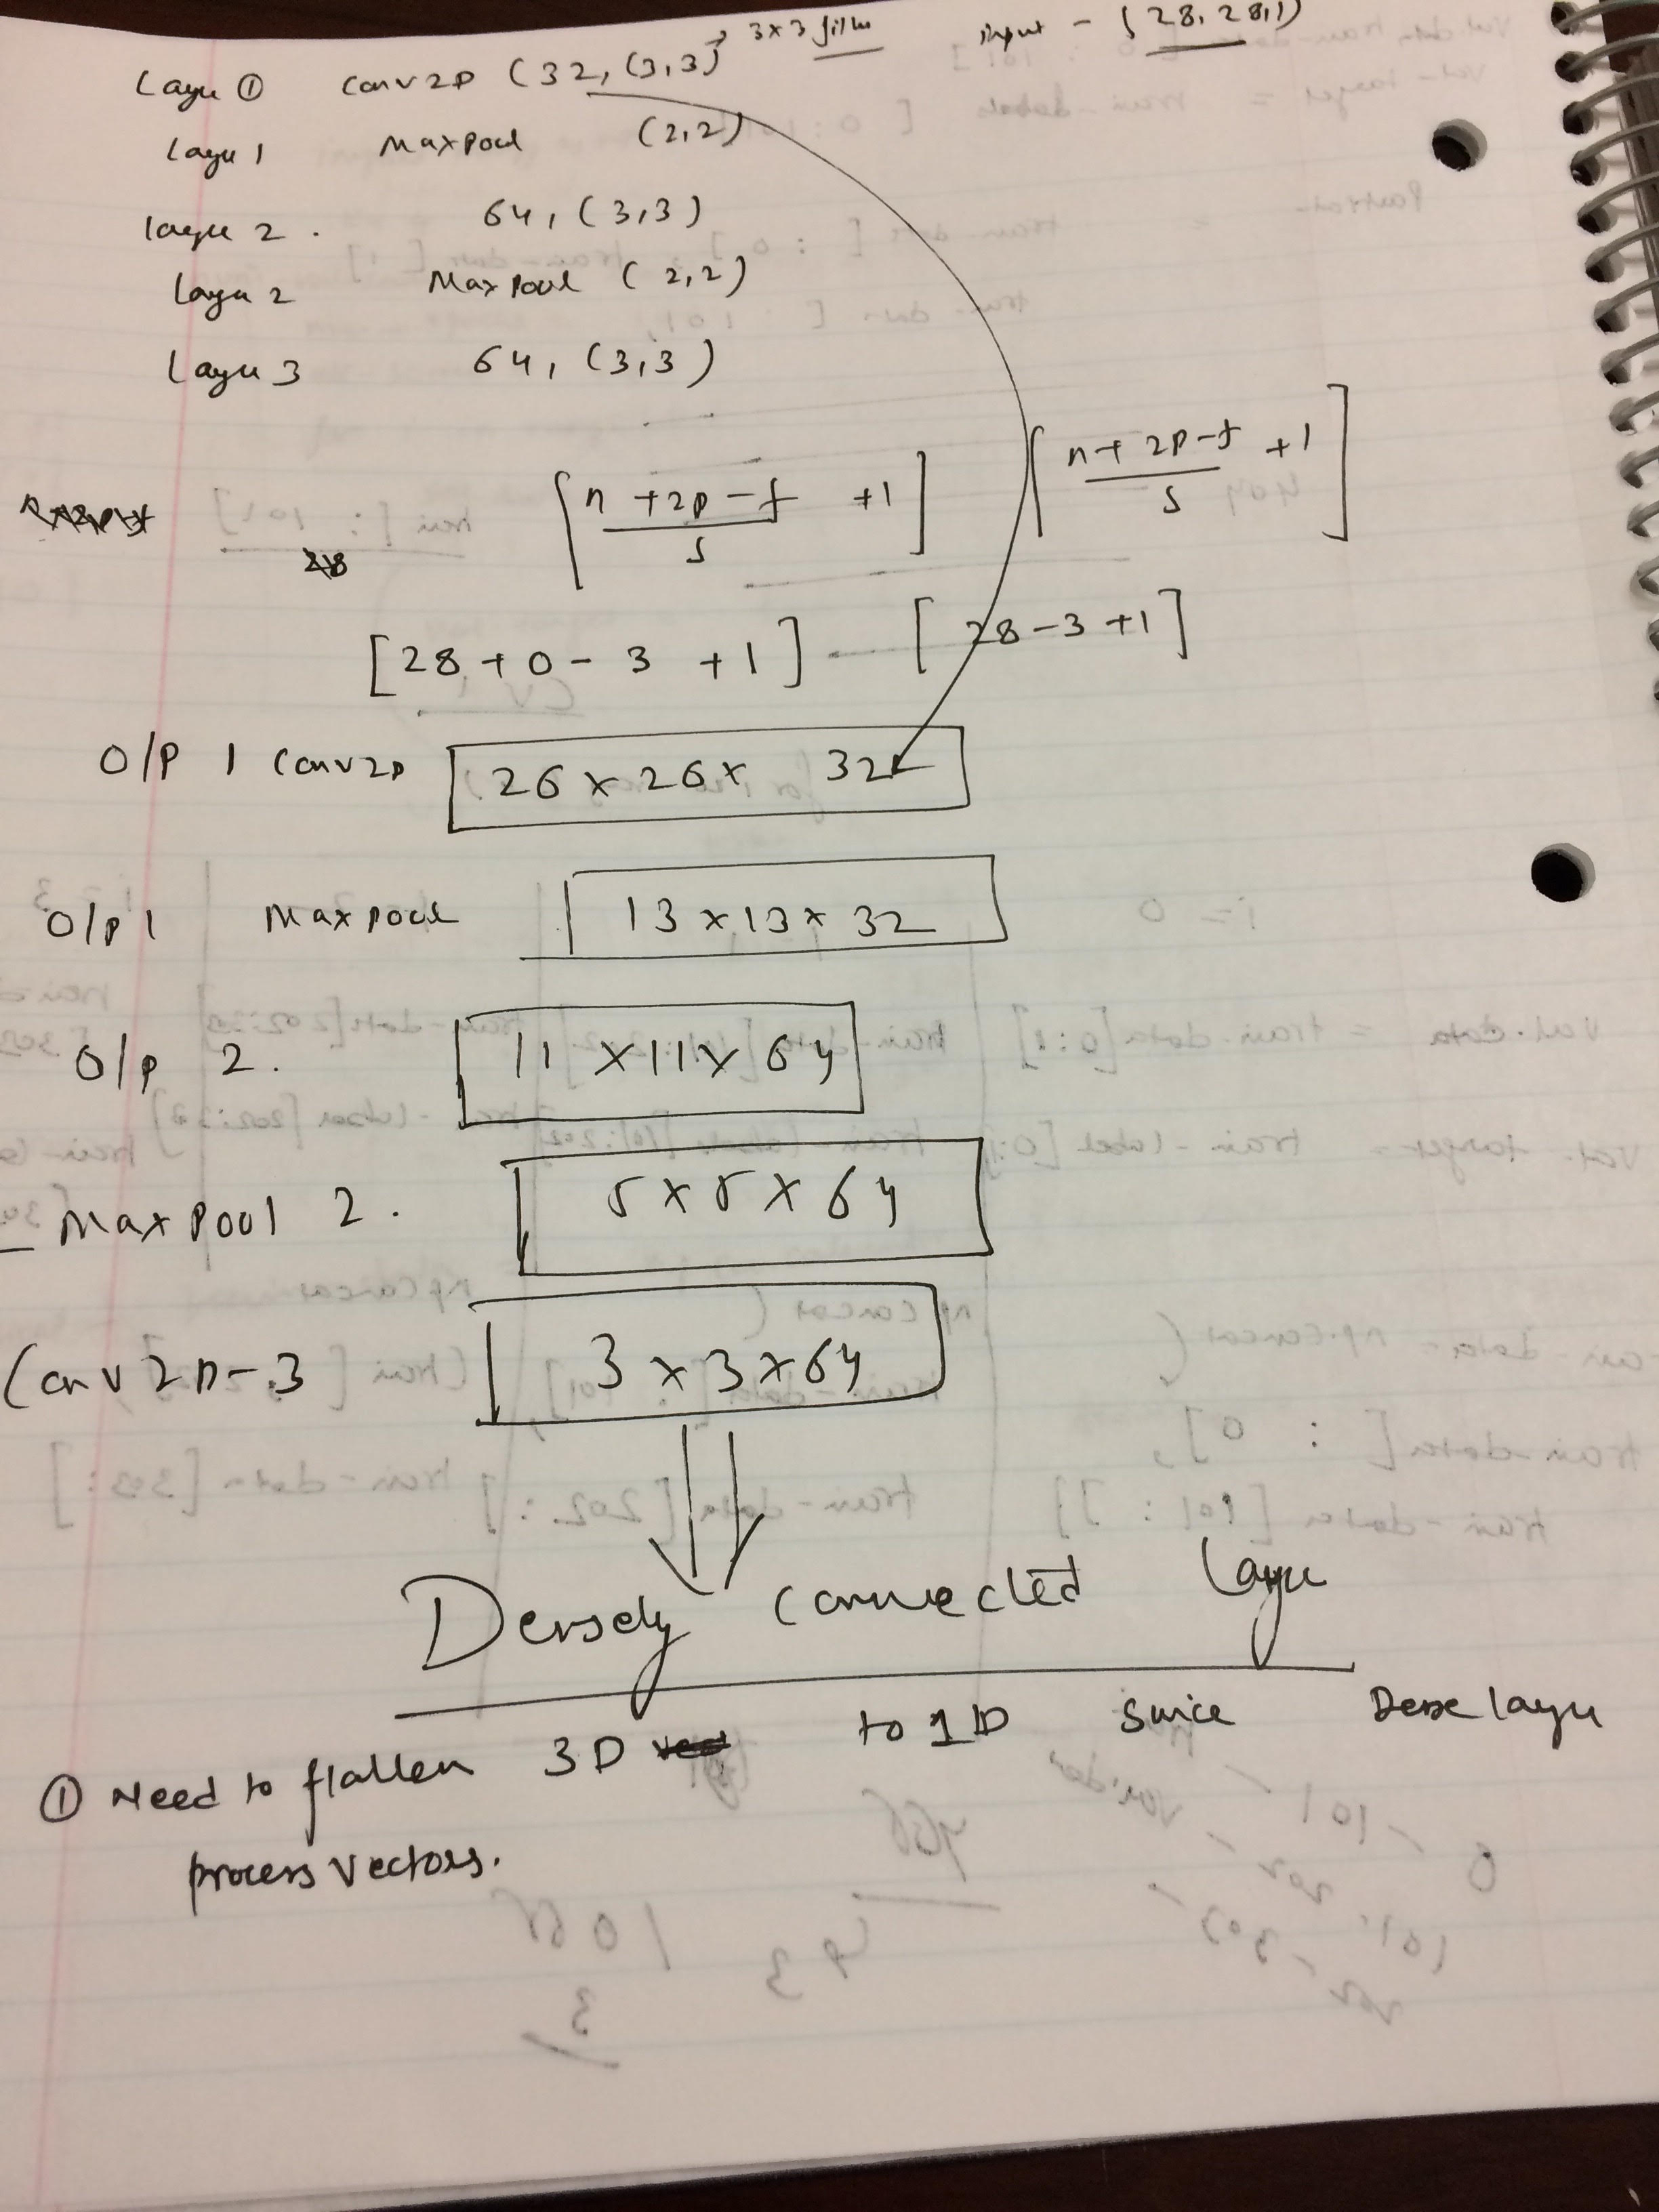

In [9]:
from IPython.display import Image
Image(filename='image1.jpg')

## Adding a classifier on top of the convnet

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

conv2d_3 (Conv2D)                (None, 3, 3, 64)      36928
________________________________________________________________
flatten_1 (Flatten)              (None, 576)           0
________________________________________________________________
dense_1 (Dense)                  (None, 64)            36928
dense_2 (Dense)                  (None, 10)            650

_______________________________________________________________

## Loading Data

In [11]:
import numpy as np

In [12]:
# Loading MNIST data
from keras.datasets import mnist

In [13]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

In [14]:
train_images= train_images.reshape((60000,28,28,1))

In [15]:
train_images=train_images.astype('float32')/255

In [17]:
test_images= test_images.reshape((10000,28,28,1))

In [18]:
test_images=test_images.astype('float32')/255

In [19]:
from keras.utils import to_categorical

In [20]:
train_labels= to_categorical(train_labels)

In [21]:
test_labels= to_categorical(test_labels)

In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 126s - loss: 0.2238 - acc: 0.9302   
Epoch 2/5
60000/60000 [==============================] - 96s - loss: 0.0546 - acc: 0.9829    
Epoch 3/5
60000/60000 [==============================] - 99s - loss: 0.0366 - acc: 0.9883    
Epoch 4/5
60000/60000 [==============================] - 103s - loss: 0.0277 - acc: 0.9912   
Epoch 5/5
60000/60000 [==============================] - 89s - loss: 0.0215 - acc: 0.9931    


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

 9952/10000 [============================>.] - ETA: 0s

In [25]:
test_acc

0.98960000000000004

*** The reason we need maxpooling

1. To have less parameters in the network. Image 24*24*64 resulting in 31000 and then we flatten it on 512 fully connected dense layer. It will result in 15.8 million parameters, very prone to overfitting